In [13]:
import os
import sys
sys.path.append('../va_pipeline/')
import json

In [25]:
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

from calculate_accuracy import *
# from drawbox import *
from process import *
from sensor import exec_file



In [30]:
df = pd.DataFrame()

In [31]:
test_dir = '../samples/testing/videos/'

for vid in list(os.listdir(test_dir)):
    print(os.path.join(test_dir, vid))
    cap = cv2.VideoCapture(os.path.join(test_dir, vid))
    ret, prev = cap.read()
    frame_no = 1
    frames_processed = 1

    diffs = []

    while frame_no <= 250:
        ret, frame = cap.read()

        if not ret:
            break
        
        if frame_no % 5 == 0:
            frame_var = np.var(frame)
            diffs.append(get_diff(frame, prev, frame_var))
            prev = frame

        frame_no += 1

    df[vid] = diffs
    cap.release()


../samples/testing/videos/large_fast.mp4
../samples/testing/videos/large_slow.mp4
../samples/testing/videos/small_fast.mp4
../samples/testing/videos/small_slow.mp4


In [32]:
# df.to_csv('./test_results/frame_diff.csv')

<Axes: >

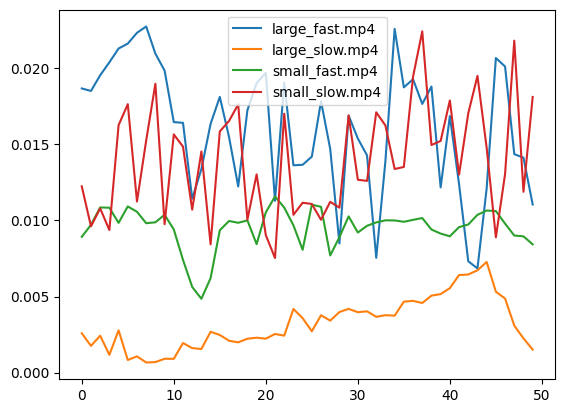

In [33]:
df.plot()
